In [21]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential, load_model
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import keras as k

In [22]:
kidney_dis = pd.read_csv("kidney_disease.csv")

In [23]:
kidney_dis.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [24]:
kidney_dis.isnull().sum().sort_values(ascending=True)

id                  0
classification      0
pe                  1
appet               1
ane                 1
cad                 2
dm                  2
htn                 2
pcc                 4
ba                  4
age                 9
bp                 12
sc                 17
bu                 19
bgr                44
al                 46
sg                 47
su                 49
hemo               52
pc                 65
pcv                70
sod                87
pot                88
wc                105
rc                130
rbc               152
dtype: int64

In [25]:
correlation = kidney_dis.corr()
correlation['classification'].sort_values(ascending=False)

KeyError: 'classification'

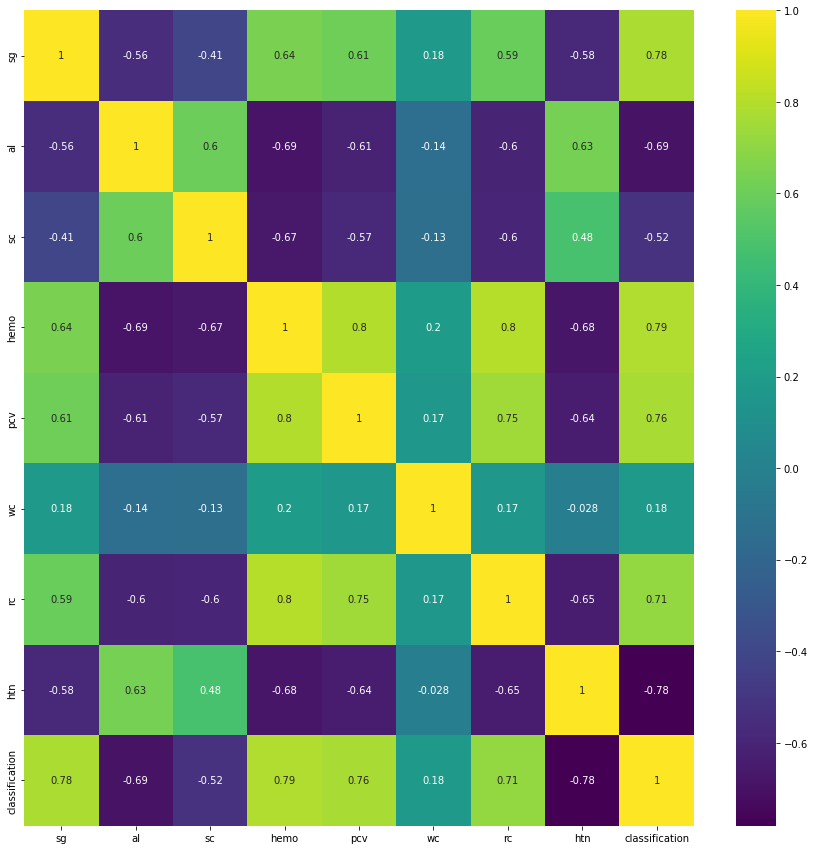

In [ ]:
corr_matrix = kidney_dis.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(15,15))
HD = sns.heatmap(kidney_dis[top_corr_features].corr(), annot=True, cmap='viridis')

In [ ]:
col_to_keep = ['sg','al','sc','hemo','pcv','wc','rc','htn','classification']
kidney_dis = kidney_dis.drop([col for col in kidney_dis.columns if not col in col_to_keep], axis=1)
kidney_dis = kidney_dis.dropna(axis=0)

In [ ]:
for column in kidney_dis.columns:
  if kidney_dis[column].dtype == np.number:
    continue
  kidney_dis[column] = LabelEncoder().fit_transform(kidney_dis[column])

<ipython-input-7-8ab8ce7ec7bc>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if kidney_dis[column].dtype == np.number:


In [ ]:
kidney_dis.head()

,sg,al,sc,hemo,pcv,wc,rc,htn,classification
0,1.020,1.0,1.2,15.4,26,65,30,1,0
3,1.005,4.0,3.8,11.2,14,55,15,1,0
4,1.010,2.0,1.4,11.6,17,61,23,0,0
5,1.015,3.0,1.1,12.2,21,65,21,1,0
7,1.015,2.0,1.1,12.4,26,57,27,0,0


In [ ]:
indep_data = kidney_dis.drop(['classification'],axis=1)
dep_data = kidney_dis['classification']

In [ ]:
indep_scaler = MinMaxScaler()
indep_scaler.fit(indep_data)
col_names = indep_data.columns
indep_data[col_names] = indep_scaler.transform(indep_data)

In [ ]:
indep_train, indep_test, dep_train, dep_test = train_test_split(indep_data, dep_data, test_size = 0.25, shuffle=True)

In [ ]:
ml = Sequential()
ml.add(Dense(256, input_dim = len(indep_data.columns), kernel_initializer = k.initializers.random_normal(seed=13), activation = 'relu'))
ml.add(Dense(1, activation = 'hard_sigmoid'))

In [ ]:
ml.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_ml = ml.fit(indep_train, dep_train, epochs=2000, batch_size=indep_train.shape[0])

Epoch 1/2000
1/1 [==============================] - 26s 26s/step - loss: 0.6891 - accuracy: 0.5843
Epoch 2/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6779 - accuracy: 0.5787
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6670 - accuracy: 0.5787
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6565 - accuracy: 0.5843
Epoch 5/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6464 - accuracy: 0.5843
Epoch 6/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6367 - accuracy: 0.5955
Epoch 7/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6274 - accuracy: 0.6011
Epoch 8/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.6292
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6097 - accuracy: 0.6461
Epoch 10/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.6012 - accuracy: 0.6461
Epoch 11/2000
1/

In [ ]:
ml.save('k_dis.model')

INFO:tensorflow:Assets written to: k_dis.model\assets


Text(0, 0.5, 'Accuracy & Loss')

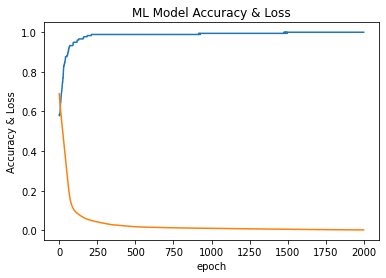

In [ ]:
plt.plot(train_ml.history['accuracy'])
plt.plot(train_ml.history['loss'])
plt.title('ML Model Accuracy & Loss')
plt.xlabel('epoch')
plt.ylabel('Accuracy & Loss')

In [ ]:
print(train_ml.history['accuracy'])

[0.584269642829895, 0.5786516666412354, 0.5786516666412354, 0.584269642829895, 0.584269642829895, 0.5955055952072144, 0.601123571395874, 0.6292135119438171, 0.6460674405097961, 0.6460674405097961, 0.6573033928871155, 0.6629213690757751, 0.6741573214530945, 0.6853932738304138, 0.6910112500190735, 0.6966292262077332, 0.7022472023963928, 0.7134831547737122, 0.7191011309623718, 0.7303370833396912, 0.7359550595283508, 0.7471910119056702, 0.7471910119056702, 0.7640449404716492, 0.7696629166603088, 0.7696629166603088, 0.7921348214149475, 0.8033707737922668, 0.8202247023582458, 0.8258426785469055, 0.8314606547355652, 0.8314606547355652, 0.8314606547355652, 0.8370786309242249, 0.8426966071128845, 0.8426966071128845, 0.8483145833015442, 0.8483145833015442, 0.8539325594902039, 0.8595505356788635, 0.8651685118675232, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8764045238494873, 0.8